In [65]:
import pandas as pd
import numpy as np

In [50]:
data = pd.read_csv('Datasets/Insurance.csv')
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,NaN,3866.85520


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1313 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1313.000000,1338.000000,1338.000000
mean,39.354260,30.668496,1.094918,13270.422265
std,15.110663,6.104087,1.205493,12110.011237
min,0.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,164.000000,53.130000,5.000000,63770.428010


In [53]:
num_data = data[['age','bmi','children','charges']]
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [54]:
from sklearn.linear_model import LinearRegression

X = num_data[['age','bmi','children']] 
Y = num_data['charges']
regr = LinearRegression()

regr.fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [55]:
import statsmodels.api as sm

X = num_data[['age','bmi','children']] 
Y = num_data['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

MissingDataError: exog contains inf or nans

In [56]:
data.isnull().sum()

age          0
gender       0
bmi         25
children     0
smoker       0
region       7
charges      0
dtype: int64

In [57]:
data.isna().sum()

age          0
gender       0
bmi         25
children     0
smoker       0
region       7
charges      0
dtype: int64

In [58]:
## We can detete the bmi column and develop regression model
del_ms_cl = data.dropna(axis=1)
del_ms_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 52.4+ KB


In [59]:
import statsmodels.api as sm

X = del_ms_cl[['age','children']] 
Y = del_ms_cl['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     70.35
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           8.95e-30
Time:                        19:05:57   Log-Likelihood:                -14411.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.884e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3128.6274    916.745      3.413      0.0

In [60]:
## Lets delete only those records with missing data
del_ms_rw = data.dropna(axis=0)
del_ms_rw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1306 non-null   int64  
 1   gender    1306 non-null   object 
 2   bmi       1306 non-null   float64
 3   children  1306 non-null   int64  
 4   smoker    1306 non-null   object 
 5   region    1306 non-null   object 
 6   charges   1306 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 81.6+ KB


In [61]:
import statsmodels.api as sm

X = del_ms_rw[['age','children','bmi']] 
Y = del_ms_rw['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     60.33
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.60e-36
Time:                        19:05:58   Log-Likelihood:                -14050.
No. Observations:                1306   AIC:                         2.811e+04
Df Residuals:                    1302   BIC:                         2.813e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6572.5008   1763.401     -3.727      0.0

In [62]:
num_data['bmi']=num_data['bmi'].fillna(num_data['bmi'].mean())

X = num_data[['age','children','bmi']] 
Y = num_data['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     62.56
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           7.65e-38
Time:                        19:05:59   Log-Likelihood:                -14390.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6638.2033   1747.863     -3.798      0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


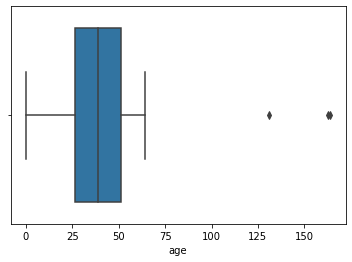

In [63]:
## Check for outliers in numeric columns

import seaborn as sns
sns.boxplot(num_data['age'])

In [69]:
# Position of the Outlier
print(np.where((num_data['age']<= 0) | (num_data['age'] > 100)))

(array([  64,  175,  420,  541,  908, 1320], dtype=int64),)


In [77]:
(num_data['age']<= 0) | (num_data['age'] > 100)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Name: age, Length: 1338, dtype: bool

In [ ]:
39.10019639780946

In [85]:
# outlier_index = np.where((num_data['age']<= 0) | (num_data['age'] > 100))


avg = num_data['age'].mean()
num_data['otl_trtd_age100'] = num_data['age'].apply(lambda v: avg if v > 100 else v)
num_data['otl_trtd_age'] = num_data['otl_trtd_age100'].apply(lambda v: avg if v <= 0 else v)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
X = num_data[['otl_trtd_age','children','bmi']] 
Y = num_data['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     58.86
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           9.86e-36
Time:                        20:34:15   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.880e+04
Df Residuals:                    1334   BIC:                         2.882e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7016.7902   1778.647     -3.945   

In [98]:
outlier_index = np.where((num_data['age']<= 0) | (num_data['age'] > 100))[0].tolist()
print(outlier_index)

num_data_otl_rem = num_data.loc[~num_data.index.isin(outlier_index)]
num_data_otl_rem.info()

[64, 175, 420, 541, 908, 1320]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          1332 non-null   int64  
 1   index            1332 non-null   int64  
 2   age              1332 non-null   int64  
 3   bmi              1332 non-null   float64
 4   children         1332 non-null   int64  
 5   charges          1332 non-null   float64
 6   otl_trtd_age     1332 non-null   float64
 7   otl_trtd_age100  1332 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 93.7 KB


In [99]:
num_data_otl_rem

X = num_data_otl_rem[['otl_trtd_age','children','bmi']] 
Y = num_data_otl_rem['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     59.20
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           6.44e-36
Time:                        20:51:14   Log-Likelihood:                -14323.
No. Observations:                1332   AIC:                         2.865e+04
Df Residuals:                    1328   BIC:                         2.868e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6943.6142   1772.761     -3.917   

In [100]:
num_data_otl_rem.head()

,level_0,index,age,bmi,children,charges,otl_trtd_age,otl_trtd_age100
0,0,0,19,27.900,0,16884.92400,19.0,19.0
1,1,1,18,33.770,1,1725.55230,18.0,18.0
2,2,2,28,33.000,3,4449.46200,28.0,28.0
3,3,3,33,22.705,0,21984.47061,33.0,33.0
4,4,4,32,28.880,0,3866.85520,32.0,32.0


In [101]:
data.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,NaN,3866.85520


In [103]:
data['index'] = data.index
data.head()

,age,gender,bmi,children,smoker,region,charges,index
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,NaN,3866.85520,4


In [104]:
full_data = pd.merge(data, num_data_otl_rem, on='index')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1331
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age_x            1332 non-null   int64  
 1   gender           1332 non-null   object 
 2   bmi_x            1307 non-null   float64
 3   children_x       1332 non-null   int64  
 4   smoker           1332 non-null   object 
 5   region           1325 non-null   object 
 6   charges_x        1332 non-null   float64
 7   index            1332 non-null   int64  
 8   level_0          1332 non-null   int64  
 9   age_y            1332 non-null   int64  
 10  bmi_y            1332 non-null   float64
 11  children_y       1332 non-null   int64  
 12  charges_y        1332 non-null   float64
 13  otl_trtd_age     1332 non-null   float64
 14  otl_trtd_age100  1332 non-null   float64
dtypes: float64(6), int64(6), object(3)
memory usage: 166.5+ KB


In [106]:
col_lst = ['index','otl_trtd_age','gender','bmi_y','children_y','smoker','region','charges_x']

df_new = full_data[col_lst]
df_new.head()

,index,otl_trtd_age,gender,bmi_y,children_y,smoker,region,charges_x
0,0,19.0,female,27.900,0,yes,southwest,16884.92400
1,1,18.0,male,33.770,1,no,southeast,1725.55230
2,2,28.0,male,33.000,3,no,southeast,4449.46200
3,3,33.0,male,22.705,0,no,northwest,21984.47061
4,4,32.0,male,28.880,0,no,NaN,3866.85520


In [108]:
df_new.isna().sum()

index           0
otl_trtd_age    0
gender          0
bmi_y           0
children_y      0
smoker          0
region          7
charges_x       0
dtype: int64

In [109]:
## Categorical missing value replacement with preceeding value
df_new['region'].fillna(method='pad', inplace=True)
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,index,otl_trtd_age,gender,bmi_y,children_y,smoker,region,charges_x
0,0,19.0,female,27.900,0,yes,southwest,16884.92400
1,1,18.0,male,33.770,1,no,southeast,1725.55230
2,2,28.0,male,33.000,3,no,southeast,4449.46200
3,3,33.0,male,22.705,0,no,northwest,21984.47061
4,4,32.0,male,28.880,0,no,northwest,3866.85520


In [110]:
df_new.isna().sum()

index           0
otl_trtd_age    0
gender          0
bmi_y           0
children_y      0
smoker          0
region          0
charges_x       0
dtype: int64

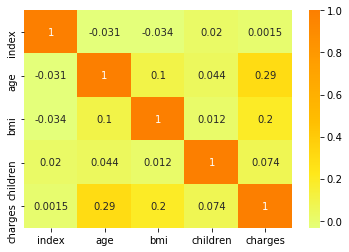

In [123]:
# correlation plot
df_new.columns = ['index','age','gender','bmi','children','smoker','region','charges']
corr = df_new.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [125]:
from scipy.stats import pointbiserialr

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_new['encoded_gender']= label_encoder.fit_transform(df_new['gender'])
charges = df_new['charges']
gender = df_new['encoded_gender']

# pbc of first question
pbc = pointbiserialr(gender, charges)
print(pbc)

PointbiserialrResult(correlation=0.05778085790856109, pvalue=0.03498038764316405)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
df_new['encoded_smoker']= label_encoder.fit_transform(df_new['smoker'])
charges = df_new['charges']
smoker = df_new['encoded_smoker']

# pbc of first question
pbc = pointbiserialr(smoker, charges)
print(pbc)

PointbiserialrResult(correlation=0.7869553665649633, pvalue=3.4067827708873634e-281)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
df_new['encoded_region']= label_encoder.fit_transform(df_new['region'])
charges = df_new['charges']
region = df_new['encoded_region']

# pbc of first question
pbc = pointbiserialr(smoker, region)
print(pbc)

PointbiserialrResult(correlation=-0.0029912447747409525, pvalue=0.913148603301016)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df = pd.get_dummies(df_new, columns=['gender', 'smoker','region'],drop_first=True)
df.head()

,index,otl_trtd_age,bmi_y,children_y,charges_x,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,19.0,27.900,0,16884.92400,0,1,0,0,1
1,1,18.0,33.770,1,1725.55230,1,0,0,1,0
2,2,28.0,33.000,3,4449.46200,1,0,0,1,0
3,3,33.0,22.705,0,21984.47061,1,0,1,0,0
4,4,32.0,28.880,0,3866.85520,1,0,1,0,0


In [114]:
df[['bmi_y', 'charges_x']] = df[['bmi_y', 'charges_x']].round(2)
df.head()

,index,otl_trtd_age,bmi_y,children_y,charges_x,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,19.0,27.90,0,16884.92,0,1,0,0,1
1,1,18.0,33.77,1,1725.55,1,0,0,1,0
2,2,28.0,33.00,3,4449.46,1,0,0,1,0
3,3,33.0,22.70,0,21984.47,1,0,1,0,0
4,4,32.0,28.88,0,3866.86,1,0,1,0,0


In [115]:
df.columns = ['index','age','bmi','children','charges','gender_male','smoker_yes','region_northwest',
              'region_southeast','region_southwest']
df.head()

,index,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,19.0,27.90,0,16884.92,0,1,0,0,1
1,1,18.0,33.77,1,1725.55,1,0,0,1,0
2,2,28.0,33.00,3,4449.46,1,0,0,1,0
3,3,33.0,22.70,0,21984.47,1,0,1,0,0
4,4,32.0,28.88,0,3866.86,1,0,1,0,0


In [116]:
X = df[['age','children','bmi','gender_male','smoker_yes','region_northwest','region_southeast','region_southwest']] 
Y = df['charges']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     491.0
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:39:31   Log-Likelihood:                -13489.
No. Observations:                1332   AIC:                         2.700e+04
Df Residuals:                    1323   BIC:                         2.704e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.171e+04   1000.723  

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['age','children','bmi','gender_male','region_northwest','region_southeast','region_southwest']]
vif = pd.DataFrame()
vif['VIF'] = list((variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])))
vif

,VIF
0,7.666835
1,1.809790
2,11.196012
3,1.987779
4,1.891215
5,2.252603
6,1.951242
